In [ ]:
# import header files
%matplotlib inline
import torch
import torch.nn as nn
import torchvision
from functools import partial
from dataclasses import dataclass
from collections import OrderedDict
import glob
import os
import random
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import time
import copy
import tqdm
import torch
import random
from PIL import Image
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset,DataLoader

In [ ]:
# load my google drive
def auth_gdrive():
  from google.colab import drive
  if os.path.exists('content/gdrive/My Drive'): return
  drive.mount('/content/gdrive')
def load_gdrive_dataset():
  loader_assets = 'MyCPD.zip'
  auth_gdrive()

In [ ]:
# mount my google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
load_gdrive_dataset()

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# unzip  dataset
!unzip "/content/gdrive/MyDrive/MyCPD.zip"

Streaming output truncated to the last 5000 lines.
  inflating: MyCPD/train/17.Oxalis/aug_47_9504160.png  
  inflating: MyCPD/train/17.Oxalis/aug_48_1383393.png  
  inflating: MyCPD/train/17.Oxalis/aug_48_3419980.png  
  inflating: MyCPD/train/17.Oxalis/aug_48_3860271.png  
  inflating: MyCPD/train/17.Oxalis/aug_48_4547603.png  
  inflating: MyCPD/train/17.Oxalis/aug_48_7487110.png  
  inflating: MyCPD/train/17.Oxalis/aug_49_191370.png  
  inflating: MyCPD/train/17.Oxalis/aug_49_3580895.png  
  inflating: MyCPD/train/17.Oxalis/aug_49_8794257.png  
  inflating: MyCPD/train/17.Oxalis/aug_49_9456949.png  
  inflating: MyCPD/train/17.Oxalis/aug_49_9540527.png  
  inflating: MyCPD/train/17.Oxalis/aug_4_1853471.png  
  inflating: MyCPD/train/17.Oxalis/aug_4_5474351.png  
  inflating: MyCPD/train/17.Oxalis/aug_4_7337710.png  
  inflating: MyCPD/train/17.Oxalis/aug_4_882568.png  
  inflating: MyCPD/train/17.Oxalis/aug_4_9865315.png  
  inflating: MyCPD/train/17.Oxalis/aug_50_3642744.png  
  in

In [ ]:
# Count the number of samples in the training set and test set
# training set
train_class_1 = os.listdir("/content/MyCPD/train/1.Thymbra/")
train_class_1_samples = len(train_class_1)
print("The number of samples in the train_class_1 is:", train_class_1_samples)
train_class_2 = os.listdir("/content/MyCPD/train/2.Erica/")
train_class_2_samples = len(train_class_2)
print("The number of samples in the train_class_2 is:", train_class_2_samples)
train_class_3 = os.listdir("/content/MyCPD/train/3.Castanea/")
train_class_3_samples = len(train_class_3)
print("The number of samples in the train_class_3 is:", train_class_3_samples)
train_class_4 = os.listdir("/content/MyCPD/train/4.Eucalyptus/")
train_class_4_samples = len(train_class_4)
print("The number of samples in the train_class_4 is:", train_class_4_samples)
train_class_5 = os.listdir("/content/MyCPD/train/5.Myrtus/")
train_class_5_samples = len(train_class_5)
print("The number of samples in the train_class_5 is:", train_class_5_samples)
train_class_6 = os.listdir("/content/MyCPD/train/6.Ceratonia/")
train_class_6_samples = len(train_class_6)
print("The number of samples in the train_class_6 is:", train_class_6_samples)
train_class_7 = os.listdir("/content/MyCPD/train/7.Urginea/")
train_class_7_samples = len(train_class_7)
print("The number of samples in the train_class_7 is:", train_class_7_samples)
train_class_8 = os.listdir("/content/MyCPD/train/8.Vitis/")
train_class_8_samples = len(train_class_8)
print("The number of samples in the train_class_8 is:", train_class_8_samples)
train_class_9 = os.listdir("/content/MyCPD/train/9.Origanum/")
train_class_9_samples = len(train_class_9)
print("The number of samples in the train_class_9 is:", train_class_9_samples)
train_class_10 = os.listdir("/content/MyCPD/train/10.Satureja/")
train_class_10_samples = len(train_class_10)
print("The number of samples in the train_class_10 is:", train_class_10_samples)
train_class_11 = os.listdir("/content/MyCPD/train/11.Pinus/")
train_class_11_samples = len(train_class_11)
print("The number of samples in the train_class_11 is:", train_class_11_samples)
train_class_12 = os.listdir("/content/MyCPD/train/12.Calicotome/")
train_class_12_samples = len(train_class_12)
print("The number of samples in the train_class_12 is:", train_class_12_samples)
train_class_13 = os.listdir("/content/MyCPD/train/13.Salvia/")
train_class_13_samples = len(train_class_13)
print("The number of samples in the train_class_13 is:", train_class_13_samples)
train_class_14 = os.listdir("/content/MyCPD/train/14.Sinapis/")
train_class_14_samples = len(train_class_14)
print("The number of samples in the train_class_14 is:", train_class_14_samples)
train_class_15 = os.listdir("/content/MyCPD/train/15.Ferula/")
train_class_15_samples = len(train_class_15)
print("The number of samples in the train_class_15 is:", train_class_15_samples)
train_class_16 = os.listdir("/content/MyCPD/train/16.Asphodelus/")
train_class_16_samples = len(train_class_16)
print("The number of samples in the train_class_16 is:", train_class_16_samples)
train_class_17 = os.listdir("/content/MyCPD/train/17.Oxalis/")
train_class_17_samples = len(train_class_17)
print("The number of samples in the train_class_17 is:", train_class_17_samples)
train_class_18 = os.listdir("/content/MyCPD/train/18.Pistacia/")
train_class_18_samples = len(train_class_18)
print("The number of samples in the train_class_18 is:", train_class_18_samples)
train_class_19 = os.listdir("/content/MyCPD/train/19.Ebenus/")
train_class_19_samples = len(train_class_19)
print("The number of samples in the train_class_19 is:", train_class_19_samples)
train_class_20 = os.listdir("/content/MyCPD/train/20.Olea/")
train_class_20_samples = len(train_class_20)
print("The number of samples in the train_class_20 is:", train_class_20_samples)
number_trainingset = len(train_class_1+train_class_2+train_class_3+train_class_4+train_class_5+train_class_6+train_class_7
                         +train_class_8+train_class_9+train_class_10+train_class_11+train_class_12+train_class_13+train_class_14
                         +train_class_15+train_class_16+train_class_17+train_class_18+train_class_19+train_class_20)
print("\n""The number of samples in the training set is:", number_trainingset)
# test set
test_class_1 = os.listdir("/content/MyCPD/test/1.Thymbra/")
test_class_1_samples = len(test_class_1)
print("\n""The number of samples in the test_class_1 is:", test_class_1_samples)
test_class_2 = os.listdir("/content/MyCPD/test/2.Erica/")
test_class_2_samples = len(test_class_2)
print("The number of samples in the test_class_2 is:", test_class_2_samples)
test_class_3 = os.listdir("/content/MyCPD/test/3.Castanea/")
test_class_3_samples = len(test_class_3)
print("The number of samples in the test_class_3 is:", test_class_3_samples)
test_class_4 = os.listdir("/content/MyCPD/test/4.Eucalyptus/")
test_class_4_samples = len(test_class_4)
print("The number of samples in the test_class_4 is:", test_class_4_samples)
test_class_5 = os.listdir("/content/MyCPD/test/5.Myrtus/")
test_class_5_samples = len(test_class_5)
print("The number of samples in the test_class_5 is:", test_class_5_samples)
test_class_6 = os.listdir("/content/MyCPD/test/6.Ceratonia/")
test_class_6_samples = len(test_class_6)
print("The number of samples in the test_class_6 is:", test_class_6_samples)
test_class_7 = os.listdir("/content/MyCPD/test/7.Urginea/")
test_class_7_samples = len(test_class_7)
print("The number of samples in the test_class_7 is:", test_class_7_samples)
test_class_8 = os.listdir("/content/MyCPD/test/8.Vitis/")
test_class_8_samples = len(test_class_8)
print("The number of samples in the test_class_8 is:", test_class_8_samples)
test_class_9 = os.listdir("/content/MyCPD/test/9.Origanum/")
test_class_9_samples = len(test_class_9)
print("The number of samples in the test_class_9 is:", test_class_9_samples)
test_class_10 = os.listdir("/content/MyCPD/test/10.Satureja/")
test_class_10_samples = len(test_class_10)
print("The number of samples in the test_class_10 is:", test_class_10_samples)
test_class_11 = os.listdir("/content/MyCPD/test/11.Pinus/")
test_class_11_samples = len(test_class_11)
print("The number of samples in the test_class_11 is:", test_class_11_samples)
test_class_12 = os.listdir("/content/MyCPD/test/12.Calicotome/")
test_class_12_samples = len(test_class_12)
print("The number of samples in the test_class_12 is:", test_class_12_samples)
test_class_13 = os.listdir("/content/MyCPD/test/13.Salvia/")
test_class_13_samples = len(test_class_13)
print("The number of samples in the test_class_13 is:", test_class_13_samples)
test_class_14 = os.listdir("/content/MyCPD/test/14.Sinapis/")
test_class_14_samples = len(test_class_14)
print("The number of samples in the test_class_14 is:", test_class_14_samples)
test_class_15 = os.listdir("/content/MyCPD/test/15.Ferula/")
test_class_15_samples = len(test_class_15)
print("The number of samples in the test_class_15 is:", test_class_15_samples)
test_class_16 = os.listdir("/content/MyCPD/test/16.Asphodelus/")
test_class_16_samples = len(test_class_16)
print("The number of samples in the test_class_16 is:", test_class_16_samples)
test_class_17 = os.listdir("/content/MyCPD/test/17.Oxalis/")
test_class_17_samples = len(test_class_17)
print("The number of samples in the test_class_17 is:", test_class_17_samples)
test_class_18 = os.listdir("/content/MyCPD/test/18.Pistacia/")
test_class_18_samples = len(test_class_18)
print("The number of samples in the test_class_18 is:", test_class_18_samples)
test_class_19 = os.listdir("/content/MyCPD/test/19.Ebenus/")
test_class_19_samples = len(test_class_19)
print("The number of samples in the test_class_19 is:", test_class_19_samples)
test_class_20 = os.listdir("/content/MyCPD/test/20.Olea/")
test_class_20_samples = len(test_class_20)
print("The number of samples in the test_class_20 is:", test_class_20_samples)
number_testset = len(test_class_1+test_class_2+test_class_3+test_class_4+test_class_5+test_class_6+test_class_7
                         +test_class_8+test_class_9+test_class_10+test_class_11+test_class_12+test_class_13+test_class_14
                         +test_class_15+test_class_16+test_class_17+test_class_18+test_class_19+test_class_20)
print("\n""The number of samples in the test set is:", number_testset)

The number of samples in the train_class_1 is: 438
The number of samples in the train_class_2 is: 450
The number of samples in the train_class_3 is: 436
The number of samples in the train_class_4 is: 425
The number of samples in the train_class_5 is: 493
The number of samples in the train_class_6 is: 400
The number of samples in the train_class_7 is: 432
The number of samples in the train_class_8 is: 402
The number of samples in the train_class_9 is: 425
The number of samples in the train_class_10 is: 420
The number of samples in the train_class_11 is: 406
The number of samples in the train_class_12 is: 447
The number of samples in the train_class_13 is: 445
The number of samples in the train_class_14 is: 490
The number of samples in the train_class_15 is: 410
The number of samples in the train_class_16 is: 408
The number of samples in the train_class_17 is: 414
The number of samples in the train_class_18 is: 408
The number of samples in the train_class_19 is: 418
The number of samples

In [ ]:
# define transforms
train_transforms = torchvision.transforms.Compose([torchvision.transforms.RandomRotation(30),
                                       torchvision.transforms.Resize((84, 84)),
                                       torchvision.transforms.RandomHorizontalFlip(),
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
# get data
train_data = torchvision.datasets.ImageFolder("/content/MyCPD/train/", transform=train_transforms)
test_data = torchvision.datasets.ImageFolder("/content/MyCPD/test/", transform=train_transforms)

In [ ]:
# data loader
trainloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True, num_workers=1, pin_memory=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True, num_workers=1, pin_memory=True)

Labels:  ['16', '15', '4', '7', '18', '5', '4', '10', '13', '5', '7', '12', '2', '15', '7', '12']


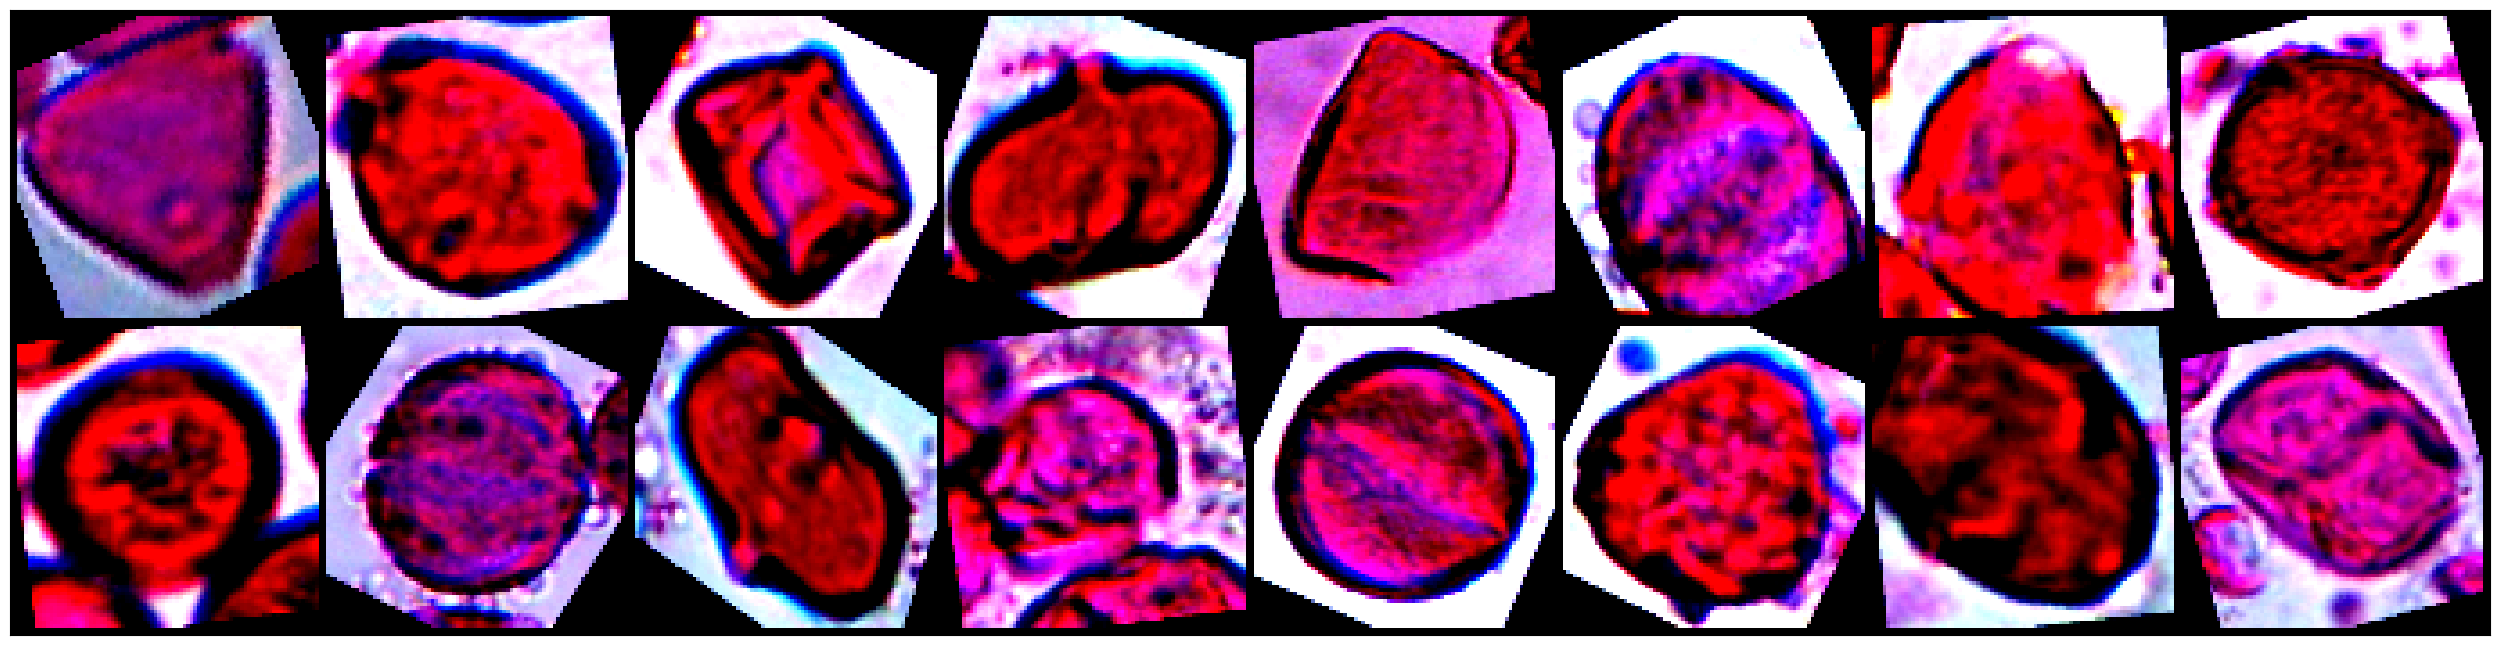

In [ ]:
# Create a list of our detection classes
classes = ["1", "2", "3", "4","5", "6", "7", "8", "9", "10", "11", "12","13", "14", "15", "16", "17", "18", "19", "20"]
# plot random a batch images
from torchvision.utils import make_grid
def show_batch(dl, classes):
  for data, labels in dl:
    fig, ax = plt.subplots(figsize=(32, 16))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(data[:32], nrow=8).squeeze().permute(1, 2, 0).clamp(0,1))
    print('Labels: ', list(map(lambda l: classes[l], labels)))
    break
show_batch(trainloader, classes)

In [ ]:
# define PVDAB

class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc1   = nn.Conv2d(in_planes, in_planes // 16, 1, bias=False)
        self.relu1 = nn.ReLU()
        self.fc2   = nn.Conv2d(in_planes // 16, in_planes, 1, bias=False)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc2(self.relu1(self.fc1(self.avg_pool(x))))
        max_out = self.fc2(self.relu1(self.fc1(self.max_pool(x))))
        out = avg_out + max_out
        return self.sigmoid(out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=3):
        super(SpatialAttention, self).__init__()

        assert kernel_size in (3, 7), 'kernel size must be 3 or 7'
        padding = 3 if kernel_size == 7 else 1

        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv1(x)
        return self.sigmoid(x)

class PVDAB(nn.Module):
    def __init__(self, in_planes):
        super(PVDAB, self).__init__()

        self.ca = ChannelAttention(in_planes)
        self.sa = SpatialAttention()

    def forward(self, x):

        out = x * (self.ca(x))
        out = out * (self.sa(out))

        return out

In [ ]:
# define the model
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

        self.pvdab = PVDAB(planes)

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out = self.pvdab(out)
        out += self.shortcut(residual)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion*planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

        self.pvdab = PVDAB(self.expansion*planes)

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out = self.pvdab(out)
        out += self.shortcut(residual)
        out = F.relu(out)
        return out


class ResNetPVDAB(nn.Module):
    def __init__(self, block, num_blocks, num_classes=20):
        super(ResNetPVDAB, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(2048*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18PVDAB():
    return ResNetPVDAB(BasicBlock, [2,2,2,2])

def ResNet34PVDAB():
    return ResNetPVDAB(BasicBlock, [3,4,6,3])

def ResNet50PVDAB():
    return ResNetPVDAB(Bottleneck, [3,4,6,3])

def ResNet101PVDAB():
    return ResNetPVDAB(Bottleneck, [3,4,23,3])

def ResNet152PVDAB():
    return ResNetPVDAB(Bottleneck, [3,8,36,3])

In [ ]:
# print the model
import math
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18PVDAB()
model.to(device)

ResNetPVDAB(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
      (pvdab): PVDAB(
        (ca): ChannelAttention(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (max_pool): AdaptiveMaxPool2d(output_size=1)
          (fc1): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (relu1): ReLU()
          (fc2): Conv2d(4, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (sigmo

In [ ]:
# print summary of the model
from torchvision import models
from torchsummary import summary
summary(model, (3, 84, 84))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 84, 84]           1,728
       BatchNorm2d-2           [-1, 64, 84, 84]             128
            Conv2d-3           [-1, 64, 84, 84]          36,864
       BatchNorm2d-4           [-1, 64, 84, 84]             128
            Conv2d-5           [-1, 64, 84, 84]          36,864
       BatchNorm2d-6           [-1, 64, 84, 84]             128
 AdaptiveAvgPool2d-7             [-1, 64, 1, 1]               0
            Conv2d-8              [-1, 4, 1, 1]             256
              ReLU-9              [-1, 4, 1, 1]               0
           Conv2d-10             [-1, 64, 1, 1]             256
AdaptiveMaxPool2d-11             [-1, 64, 1, 1]               0
           Conv2d-12              [-1, 4, 1, 1]             256
             ReLU-13              [-1, 4, 1, 1]               0
           Conv2d-14             [-1, 6

In [ ]:
# loss function to be used
criterion = torch.nn.CrossEntropyLoss()
# optimizer to be used
optimizer = torch.optim.SGD(model.parameters(), lr=5e-3, momentum=0.9, weight_decay=5e-4)

In [ ]:
# training process
from torch.utils.tensorboard import SummaryWriter
train_losses = 0.0
train_accuracy = 0
epochs = 50
for epoch in range(epochs):  # loop over the dataset multiple times
    print('Epoch-{0}:'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data # get the inputs; data is a list of [inputs, labels]
        inputs, labels = inputs.cuda(), labels.cuda() # for using data in GPU
        optimizer.zero_grad() # zero the parameter gradients
        outputs = model(inputs) # forward
        loss = criterion(outputs, labels) # calculate loss
        loss.backward() # backward loss
        optimizer.step() # optimize gradients
        train_losses += loss.item() # save loss
        _, preds = torch.max(outputs, 1) # save prediction
        train_accuracy += torch.sum(preds == labels.data) # save train_accuracy
        if i % 1000 == 999:    # every 1000 mini-batches...
            steps = epoch * len(trainloader) + i # calculate steps
            batch = i*batch_size # calculate batch
            print("Training loss {:.5} Training Accuracy {:.5} Steps: {}".format(train_losses / batch, train_accuracy/batch, steps))
            # Save train_accuracy and loss to Tensorboard
            writer.add_scalar('Training loss by steps', train_losses / batch, steps)
            writer.add_scalar('Training accuracy by steps', train_accuracy / batch, steps)
    print("Training Accuracy: {}/{} ({:.5} %) Training Loss: {:.5}".format(train_accuracy, len(trainloader), 100. * train_accuracy / len(trainloader.dataset), train_losses / len(trainloader.dataset)))
    train_losses = 0.0
    train_accuracy = 0
print('Train is finished...')

Epoch-1:
Training Accuracy: 5422/542 (62.595 %) Training Loss: 0.07301
Epoch-2:
Training Accuracy: 7229/542 (83.456 %) Training Loss: 0.031954
Epoch-3:
Training Accuracy: 7840/542 (90.51 %) Training Loss: 0.018437
Epoch-4:
Training Accuracy: 8076/542 (93.235 %) Training Loss: 0.013033
Epoch-5:
Training Accuracy: 8193/542 (94.586 %) Training Loss: 0.010173
Epoch-6:
Training Accuracy: 8340/542 (96.283 %) Training Loss: 0.0071722
Epoch-7:
Training Accuracy: 8403/542 (97.01 %) Training Loss: 0.0055962
Epoch-8:
Training Accuracy: 8443/542 (97.472 %) Training Loss: 0.0046613
Epoch-9:
Training Accuracy: 8487/542 (97.98 %) Training Loss: 0.0038864
Epoch-10:
Training Accuracy: 8505/542 (98.187 %) Training Loss: 0.0035594
Epoch-11:
Training Accuracy: 8531/542 (98.488 %) Training Loss: 0.0029115
Epoch-12:
Training Accuracy: 8487/542 (97.98 %) Training Loss: 0.0036771
Epoch-13:
Training Accuracy: 8577/542 (99.019 %) Training Loss: 0.0021382
Epoch-14:
Training Accuracy: 8579/542 (99.042 %) Training

In [ ]:
# test proess
from torch.utils.tensorboard import SummaryWriter
test_losses = 0.0
test_accuracy = 0
epochs = 50
for epoch in range(epochs):  # loop over the dataset multiple times
    print('Epoch-{0}:'.format(epoch + 1, optimizer.param_groups[0]['lr']))
    for i, data in enumerate(testloader, 0):
        inputs, labels = data # get the inputs; data is a list of [inputs, labels]
        inputs, labels = inputs.cuda(), labels.cuda() # for using data in GPU
        optimizer.zero_grad() # zero the parameter gradients
        outputs = model(inputs) # forward
        loss = criterion(outputs, labels) # calculate loss
        loss.backward() # backward loss
        optimizer.step() # optimize gradients
        test_losses += loss.item() # save loss
        _, preds = torch.max(outputs, 1) # save prediction
        test_accuracy += torch.sum(preds == labels.data) # save test_accuracy
        if i % 1000 == 999:    # every 1000 mini-batches...
            steps = epoch * len(testloader) + i # calculate steps
            batch = i*batch_size # calculate batch
            print("Test loss {:.5} Test Accuracy {:.5} Steps: {}".format(test_losses / batch, test_accuracy/batch, steps))
            # Save test_accuracy and loss to Tensorboard
            writer.add_scalar('Test loss by steps', test_losses / batch, steps)
            writer.add_scalar('Test accuracy by steps', test_accuracy / batch, steps)
    print("Test Accuracy: {}/{} ({:.5} %) Test Loss: {:.5}".format(test_accuracy, len(testloader), 100. * test_accuracy / len(testloader.dataset), test_losses / len(testloader.dataset)))
    test_losses = 0.0
    test_accuracy = 0
print('Test is Finished...')

Epoch-1:
Test Accuracy: 1769/127 (87.705 %) Test Loss: 0.028787
Epoch-2:
Test Accuracy: 1906/127 (94.497 %) Test Loss: 0.013257
Epoch-3:
Test Accuracy: 1831/127 (90.778 %) Test Loss: 0.020306
Epoch-4:
Test Accuracy: 1850/127 (91.72 %) Test Loss: 0.017512
Epoch-5:
Test Accuracy: 1905/127 (94.447 %) Test Loss: 0.010974
Epoch-6:
Test Accuracy: 1947/127 (96.53 %) Test Loss: 0.0070098
Epoch-7:
Test Accuracy: 1928/127 (95.588 %) Test Loss: 0.0074955
Epoch-8:
Test Accuracy: 1977/127 (98.017 %) Test Loss: 0.0067025
Epoch-9:
Test Accuracy: 1871/127 (92.762 %) Test Loss: 0.014425
Epoch-10:
Test Accuracy: 1963/127 (97.323 %) Test Loss: 0.0053455
Epoch-11:
Test Accuracy: 1951/127 (96.728 %) Test Loss: 0.0075091
Epoch-12:
Test Accuracy: 1886/127 (93.505 %) Test Loss: 0.013658
Epoch-13:
Test Accuracy: 1967/127 (97.521 %) Test Loss: 0.0053735
Epoch-14:
Test Accuracy: 1961/127 (97.224 %) Test Loss: 0.0067154
Epoch-15:
Test Accuracy: 1940/127 (96.182 %) Test Loss: 0.0088758
Epoch-16:
Test Accuracy: 194

--2023-10-23 16:44:55--  https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 20.29.134.23
Connecting to github.com (github.com)|20.29.134.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706 (5.6K) [text/plain]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman.ttf’

Times New Roman.ttf 100%[===================>]   5.57K  --.-KB/s    in 0s      

2023-10-23 16:44:55 (102 MB/s) - ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Times New Roman.ttf’ saved [5706/5706]



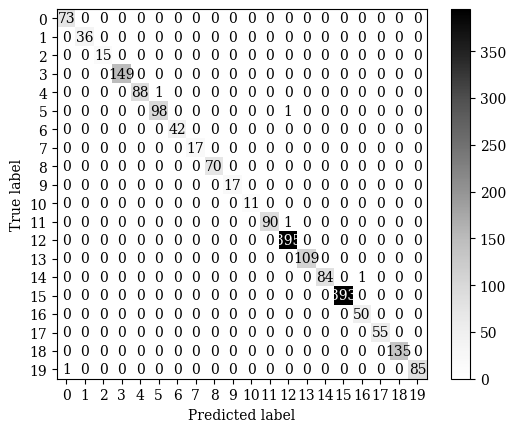

In [ ]:
# import Times New Roman font
import matplotlib.font_manager
!wget https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# test confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn
import pandas as pd
y_pred = []
y_true = []
# iterate over test data
for inputs, labels in testloader:
        inputs, labels = inputs.cuda(), labels.cuda()
        output = model(inputs) # Feed Network
        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap=plt.cm.Greys)


An image of class 1.Thymbra:


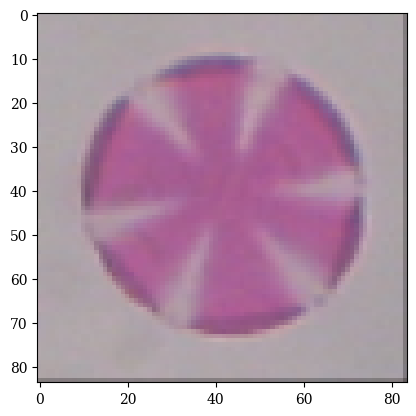

In [ ]:
import tensorflow
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
image = load_img('/content/MyCPD/train/1.Thymbra/x40f23.png')
data = img_to_array(image)
samples = np.expand_dims(data, 0)
print('An image of class 1.Thymbra:')
plt.imshow(image)
plt.show()

In [ ]:
from torchvision import models, transforms, utils
transform = transforms.Compose([
    transforms.Resize((84, 84)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])
# we will save the conv layer weights in this list
model_weights =[]
# we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 17
conv_layers


In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 84, 84])
Image shape after: torch.Size([1, 3, 84, 84])


In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
# print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(84, 84)
(84, 84)
(84, 84)
(84, 84)
(84, 84)
(42, 42)
(42, 42)
(42, 42)
(42, 42)
(21, 21)
(21, 21)
(21, 21)
(21, 21)
(11, 11)
(11, 11)
(11, 11)
(11, 11)


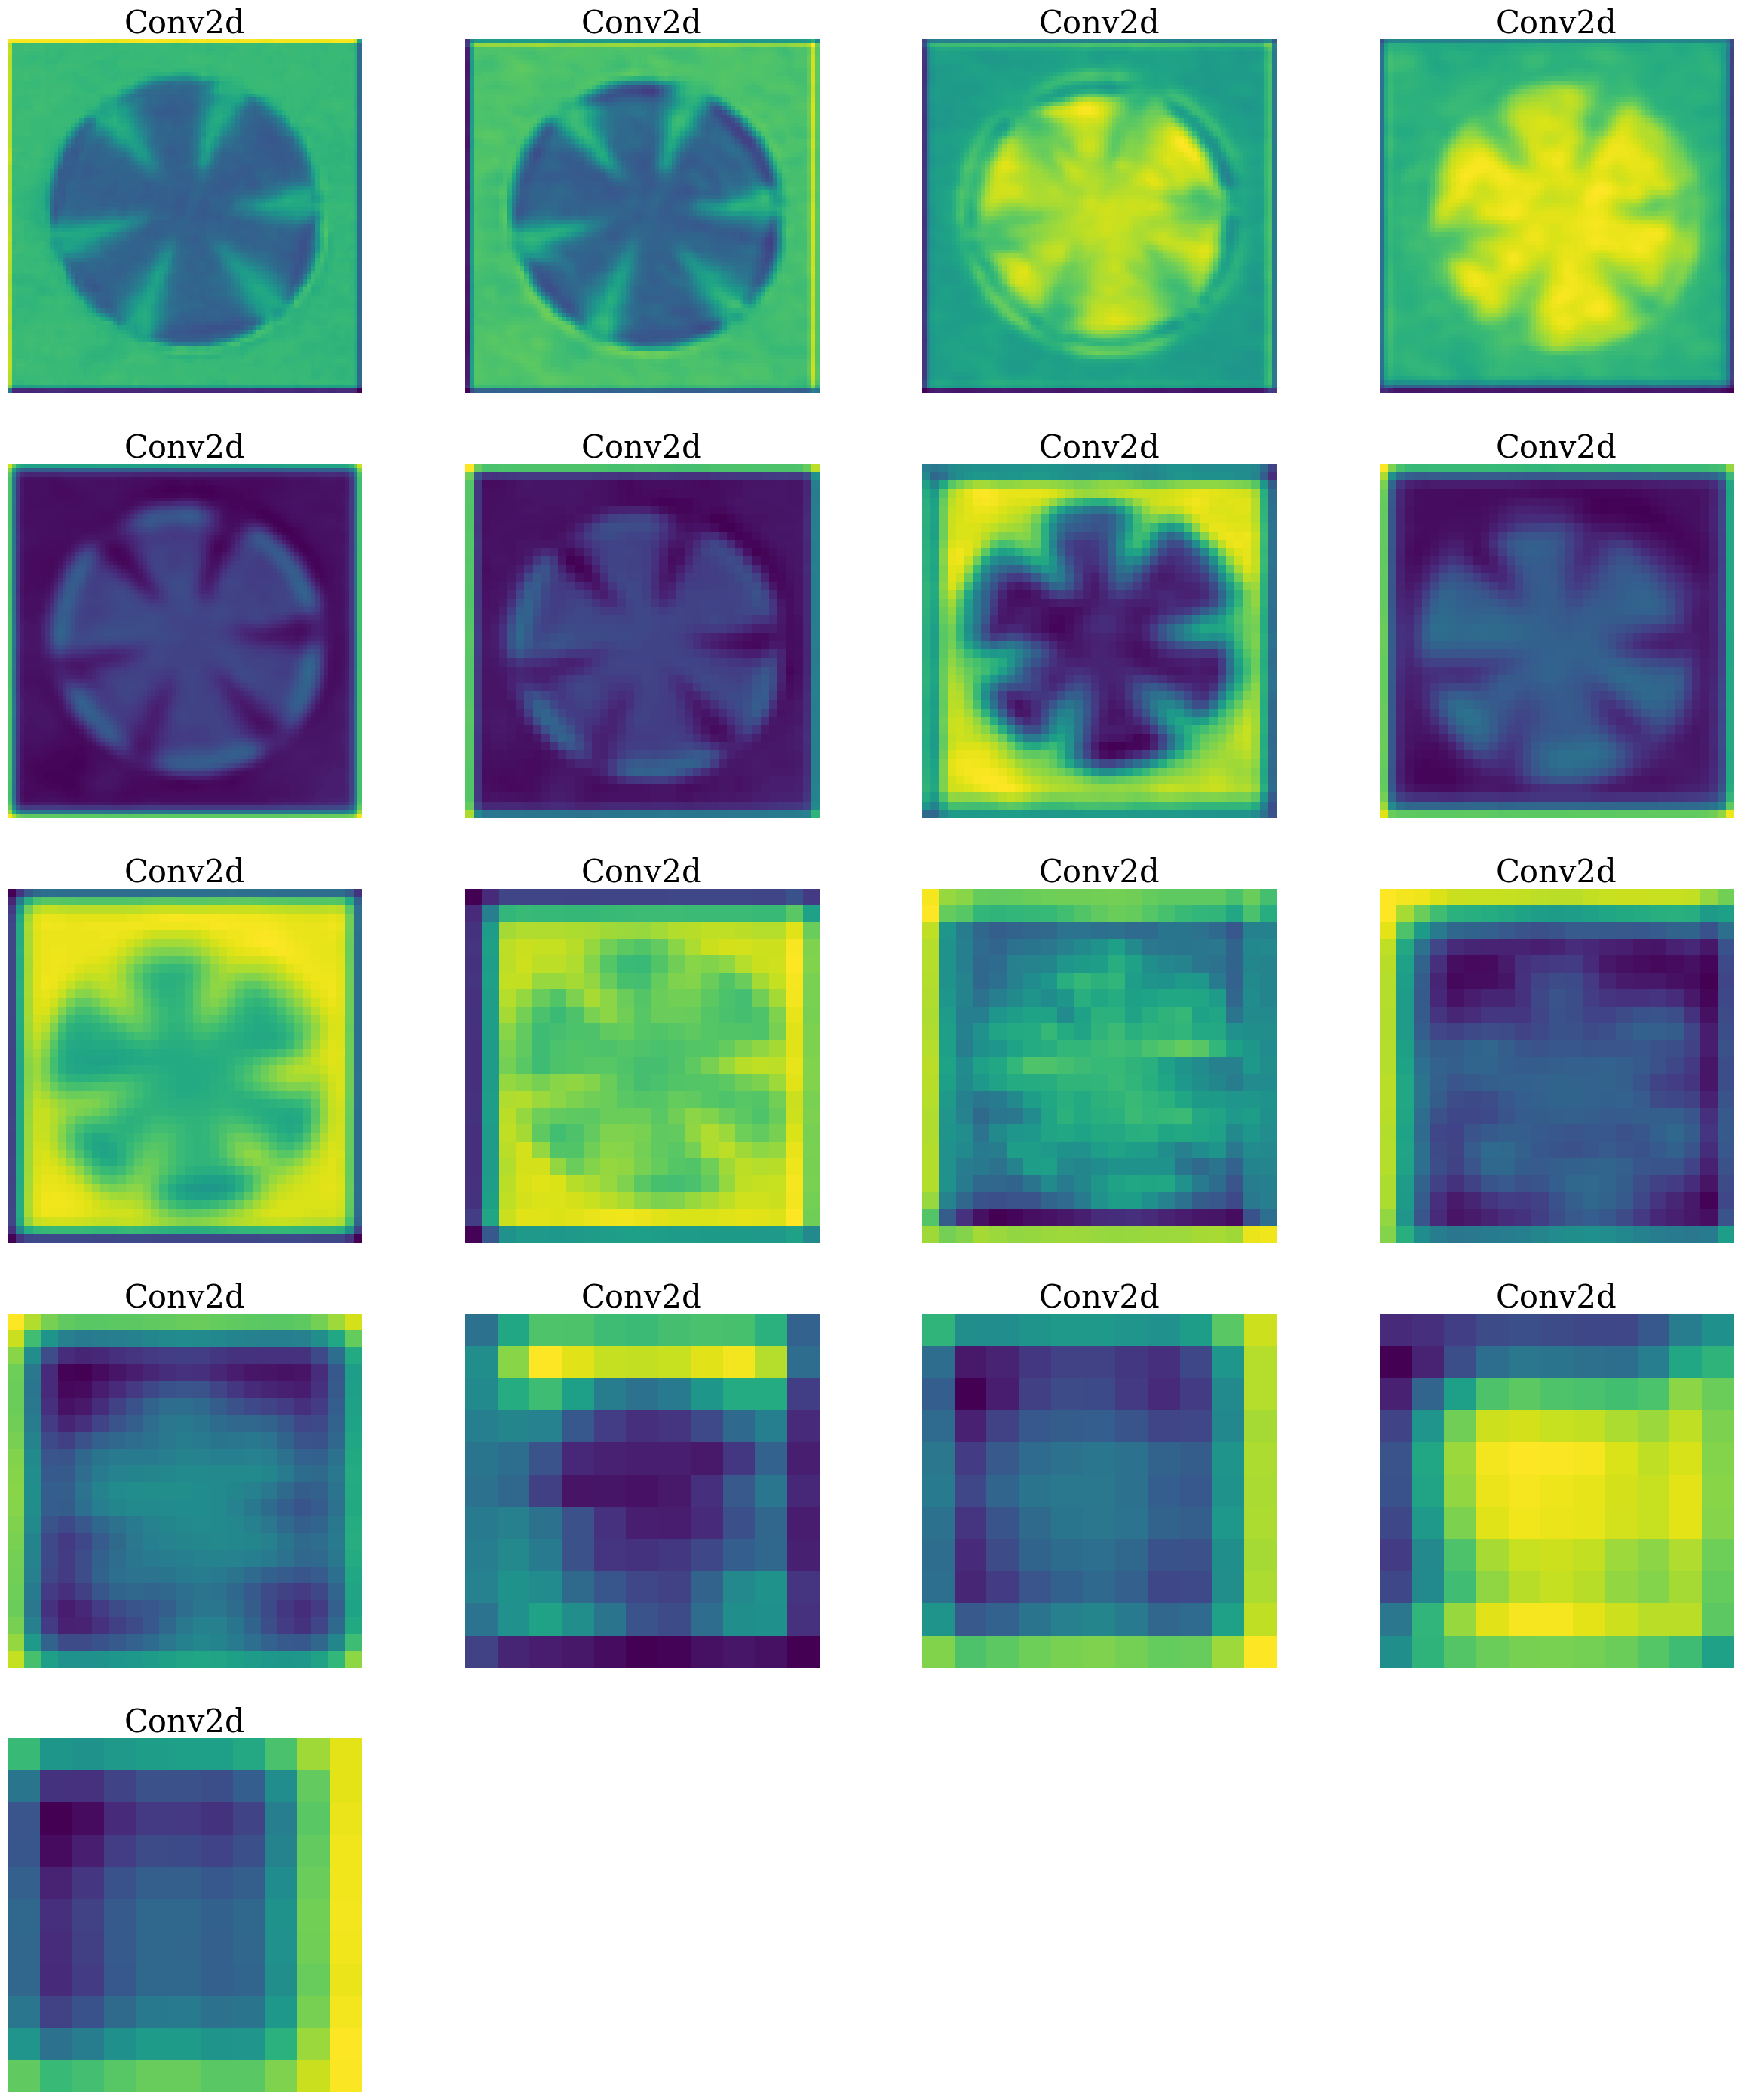

In [ ]:
# print /1.Thymbra feature maps
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(7, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

An image of class 3.Castanea:


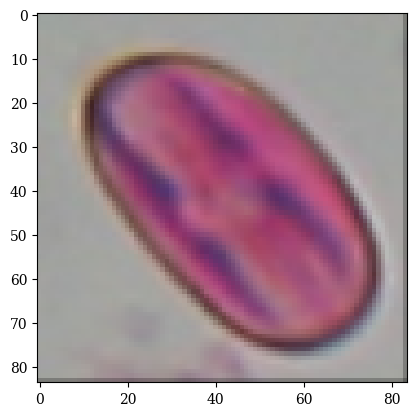

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
image = load_img('/content/MyCPD/train/3.Castanea/FagCsatX400wF792781G7.png')
data = img_to_array(image)
samples = np.expand_dims(data, 0)
print('An image of class 3.Castanea:')
plt.imshow(image)
plt.show()

In [ ]:
from torchvision import models, transforms, utils
transform = transforms.Compose([
    transforms.Resize((84, 84)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

In [ ]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 17
conv_layers


In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 84, 84])
Image shape after: torch.Size([1, 3, 84, 84])


In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
# print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(84, 84)
(84, 84)
(84, 84)
(84, 84)
(84, 84)
(42, 42)
(42, 42)
(42, 42)
(42, 42)
(21, 21)
(21, 21)
(21, 21)
(21, 21)
(11, 11)
(11, 11)
(11, 11)
(11, 11)


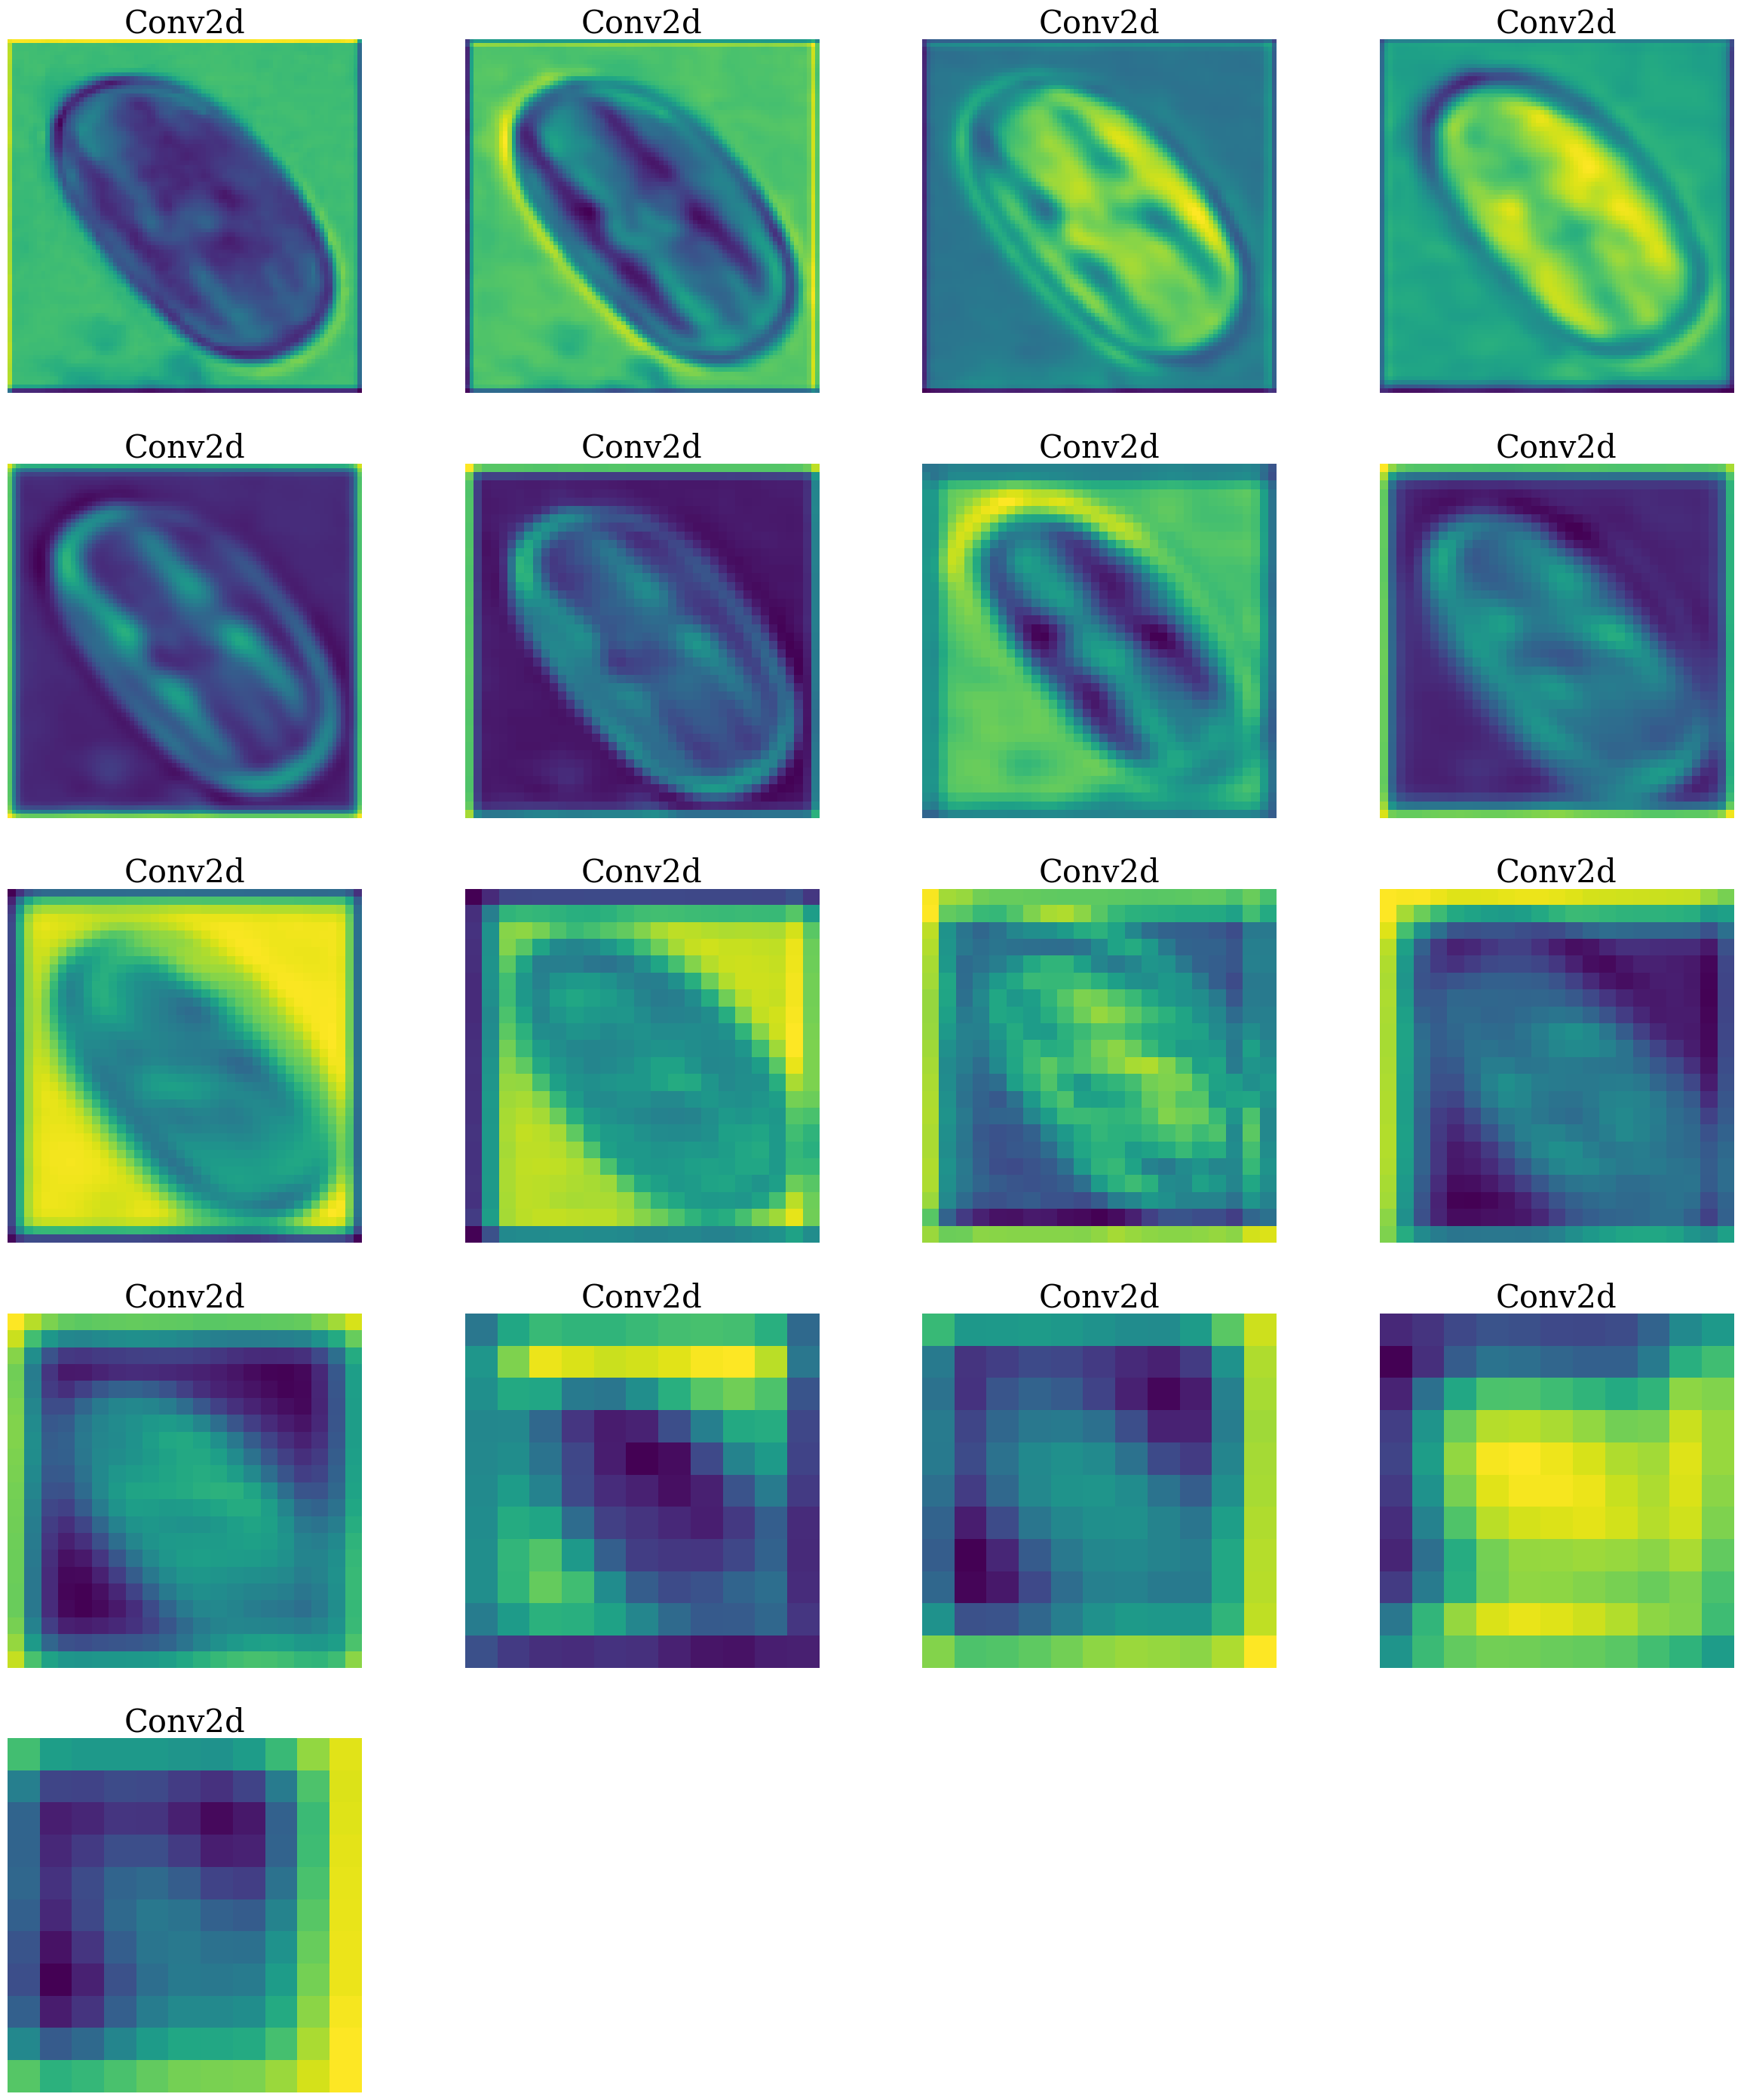

In [ ]:
# print 3.Castanea feature maps
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(7, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

An image of class 10.Satureja:


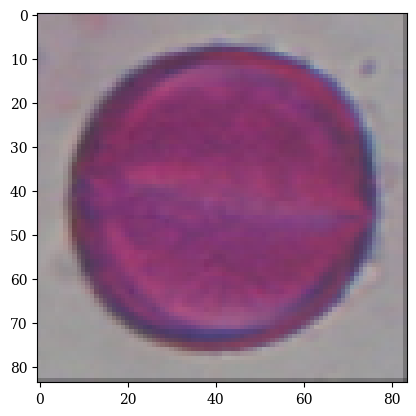

In [ ]:
import tensorflow
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
image = load_img('/content/MyCPD/train/10.Satureja/LamSthyX400wF9450F1.png')
data = img_to_array(image)
samples = np.expand_dims(data, 0)
print('An image of class 10.Satureja:')
plt.imshow(image)
plt.show()

In [ ]:
from torchvision import models, transforms, utils
transform = transforms.Compose([
    transforms.Resize((84, 84)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

In [ ]:
# we will save the conv layer weights in this list
model_weights =[]
# we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print("conv_layers")

Total convolution layers: 17
conv_layers


In [ ]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 84, 84])
Image shape after: torch.Size([1, 3, 84, 84])


In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
# print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 64, 84, 84])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 128, 42, 42])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 256, 21, 21])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])
torch.Size([1, 512, 11, 11])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(84, 84)
(84, 84)
(84, 84)
(84, 84)
(84, 84)
(42, 42)
(42, 42)
(42, 42)
(42, 42)
(21, 21)
(21, 21)
(21, 21)
(21, 21)
(11, 11)
(11, 11)
(11, 11)
(11, 11)


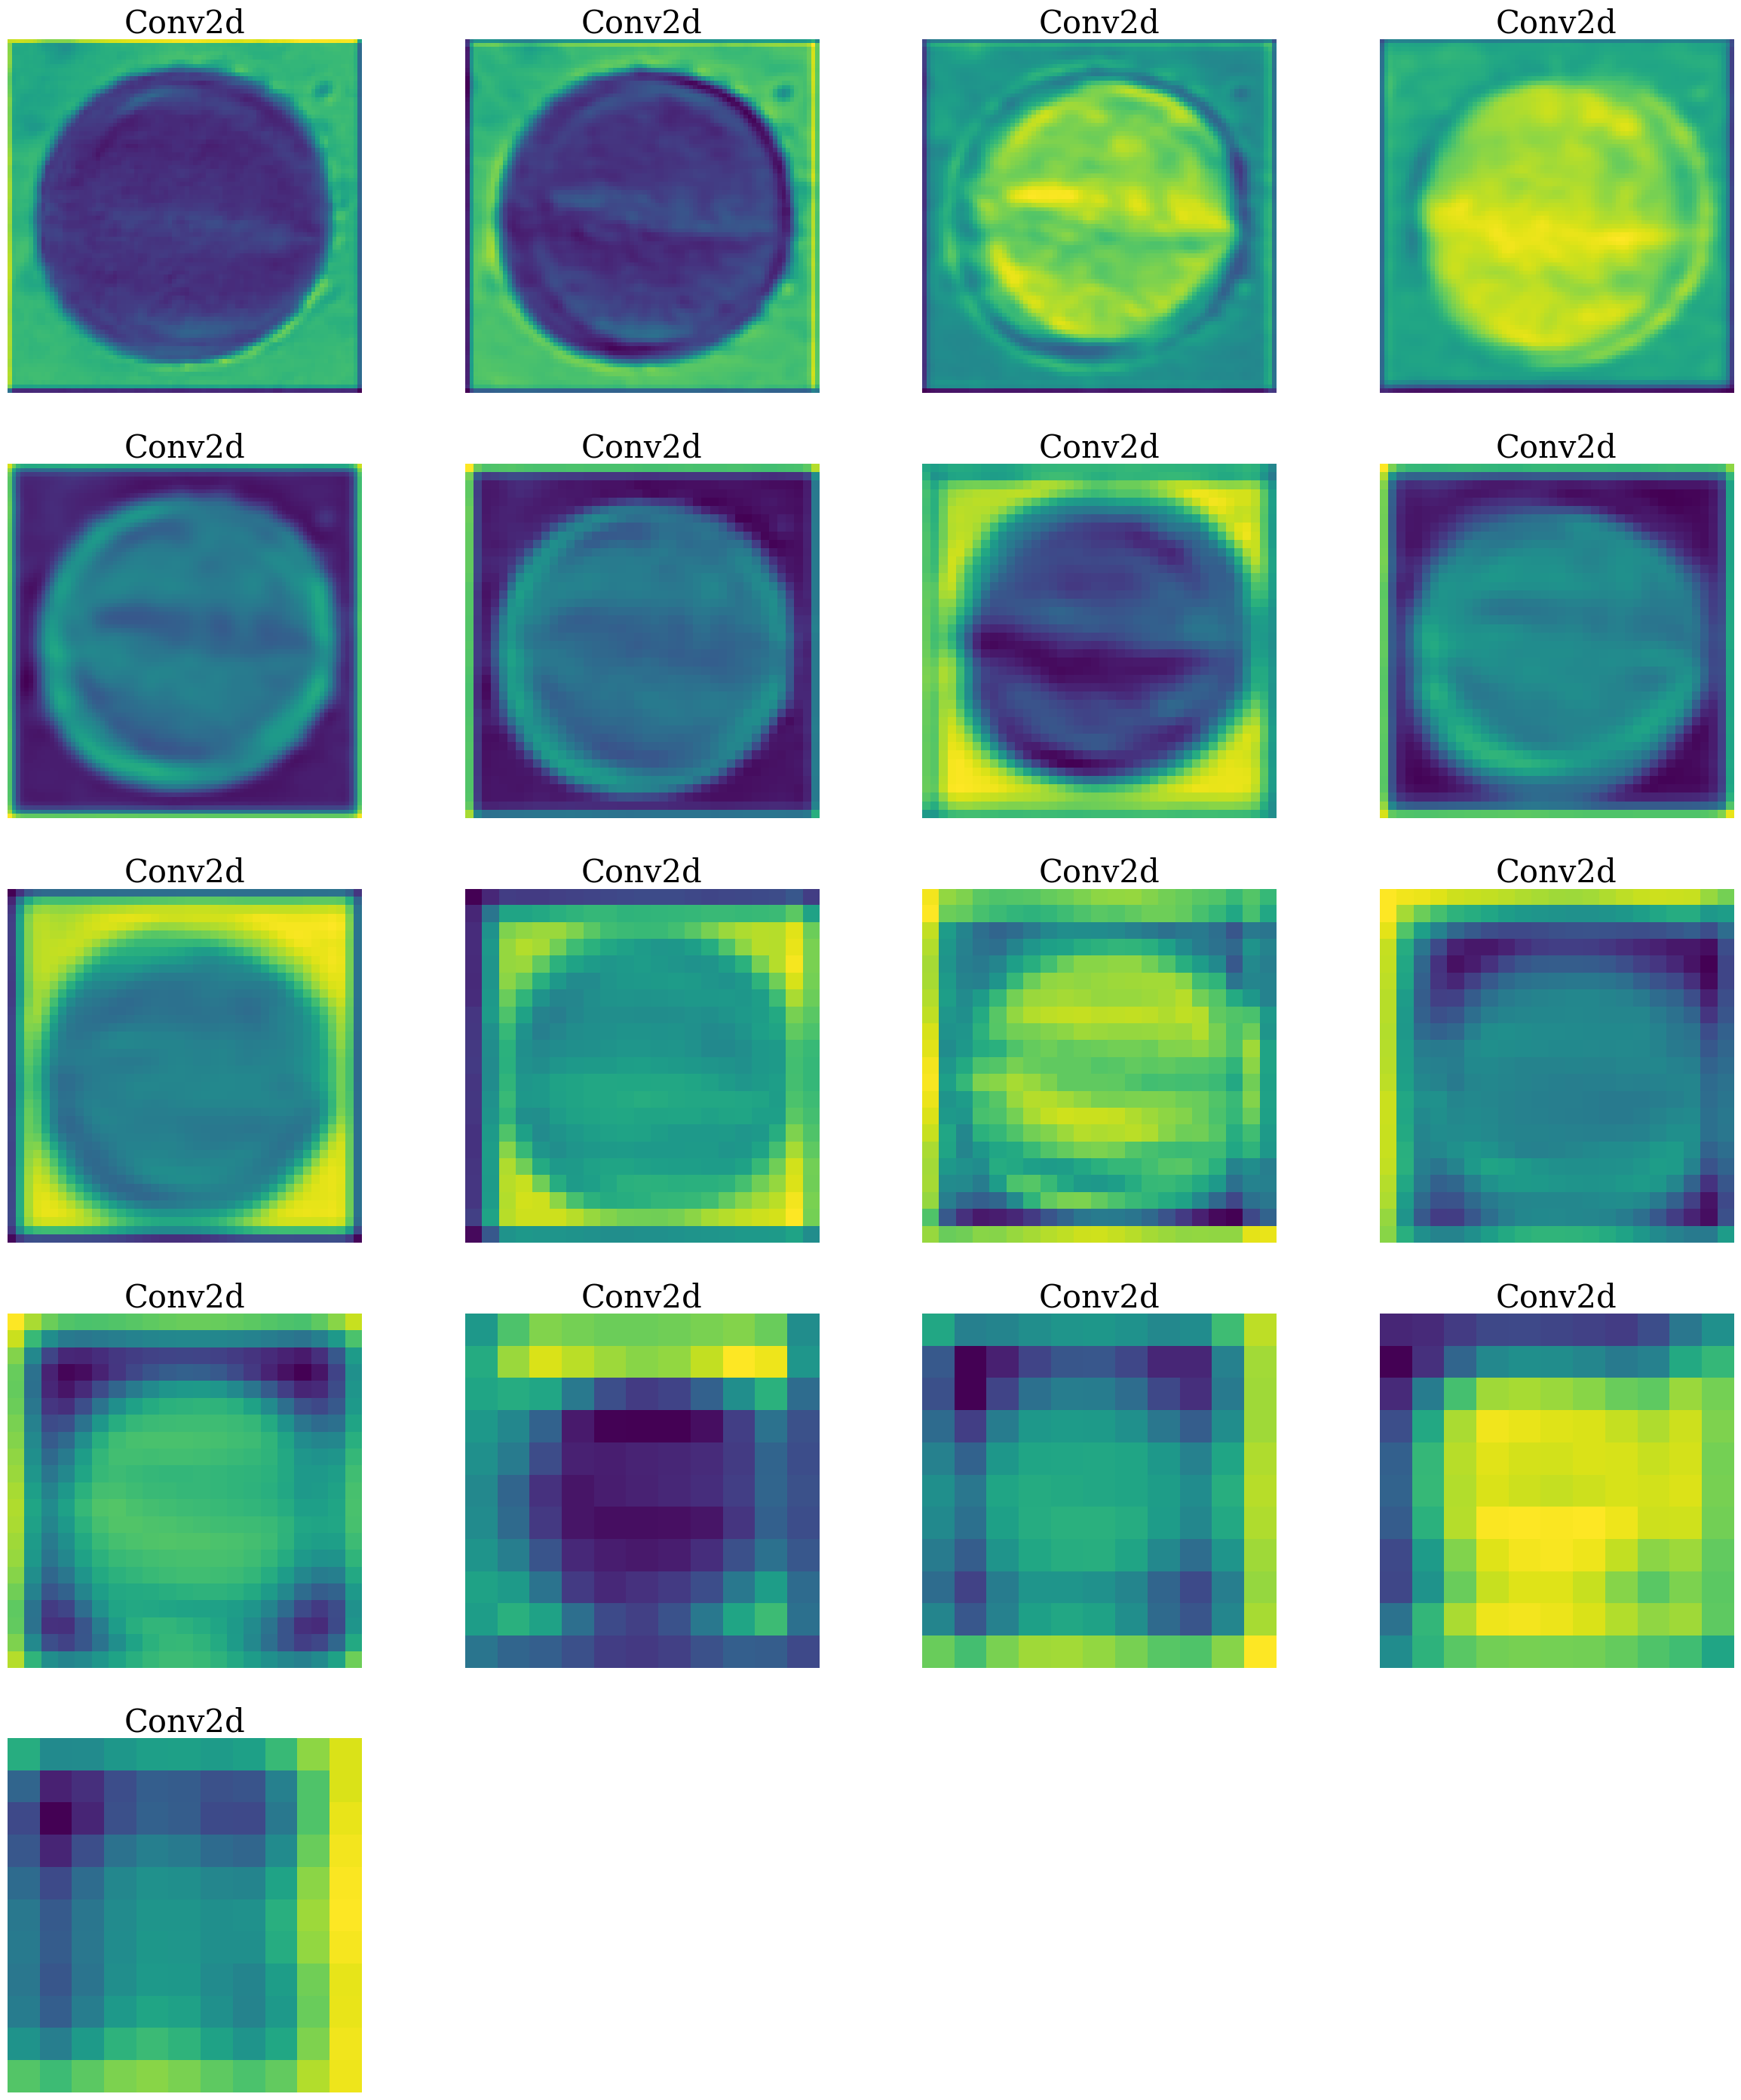

In [ ]:
# print 10.Satureja feature maps
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(7, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

In [ ]:
!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-jvr5zhqg
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-jvr5zhqg
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 09ac162e8f609eed02a8e35a370ef5bf30de19a1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=37447 sha256=1d438c1a527d526645a3be5ca744de805952702b5fc59bda272bad7c5734ac73
  Stored in directory: /tmp/pip-ephem-wheel-cache-c7uzc6vb/wheels/23/11/66/71a38b0c29ba4ec5f62105a2145278613855bc9c94eecf630d
Successfully built grad-cam


In [ ]:
import copy
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet18
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torchvision

In [ ]:
# Pick up layers for visualization
target_layers = [model.layer4[-1]]

An image of class 1.Thymbra:


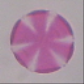

In [ ]:
path1 = ('/content/MyCPD/train/1.Thymbra/x40f23.png')
print('An image of class 1.Thymbra:')
Image.open(path1).convert('RGB')

In [ ]:
rgb_img = Image.open(path1).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
# cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=False)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

GradCAM of image:


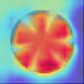

In [ ]:
# plot GradCAM of image
print('GradCAM of image:')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path1).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

GradCAMPlusPlus of image:


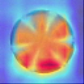

In [ ]:
# plot GradCAMPlusPlus of image
print('GradCAMPlusPlus of image:')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path1).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=True)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

100%|██████████| 32/32 [00:01<00:00, 22.03it/s]


ScoreCAM of image:


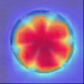

In [ ]:
# plot ScoreCAM of image
print('ScoreCAM of image:')
Image.fromarray(visualization, 'RGB')

An image of class 3.Castanea:


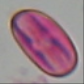

In [ ]:
path2 = ('/content/MyCPD/train/3.Castanea/FagCsatX400wF792781G7.png')
print('An image of class 3.Castanea:')
Image.open(path2).convert('RGB')

In [ ]:
rgb_img = Image.open(path2).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam1 = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam1 = cam1(input_tensor=input_tensor)

# In this example grayscale_cam1 has only one image in the batch:
grayscale_cam1 = grayscale_cam1[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam1, use_rgb=True)

GradCAM of image:


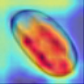

In [ ]:
# plot GradCAM of image
print('GradCAM of image:')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path2).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

GradCAMPlusPlus of image:


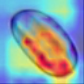

In [ ]:
# plot GradCAMPlusPlus of image
print('GradCAMPlusPlus of image:')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path2).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=True)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

100%|██████████| 32/32 [00:01<00:00, 24.40it/s]


ScoreCAM of image:


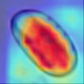

In [ ]:
# plot ScoreCAM of image
print('ScoreCAM of image:')
Image.fromarray(visualization, 'RGB')

An image of class 10.Satureja:


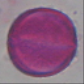

In [ ]:
path3 = ('/content/MyCPD/train/10.Satureja/LamSthyX400wF9450F1.png')
print('An image of class 10.Satureja:')
Image.open(path3).convert('RGB')

In [ ]:
rgb_img = Image.open(path3).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam1 = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam1 = cam1(input_tensor=input_tensor)

# In this example grayscale_cam1 has only one image in the batch:
grayscale_cam1 = grayscale_cam1[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam1, use_rgb=True)

GradCAM of image:


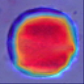

In [ ]:
# plot GradCAM of image
print('GradCAM of image:')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path3).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
# cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=False)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

GradCAMPlusPlus of image:


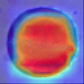

In [ ]:
# plot GradCAMPlusPlus of image
print('GradCAMPlusPlus of image:')
Image.fromarray(visualization, 'RGB')

In [ ]:
rgb_img = Image.open(path3).convert('RGB')
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))
# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()
# Note: input_tensor can be a batch tensor with several images!
# Construct the CAM object once, and then re-use it on many images:
#cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)
#cam = GradCAMPlusPlus(model=model, target_layers=target_layers, use_cuda=True)
cam = ScoreCAM(model=model, target_layers=target_layers, use_cuda=True)
# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...
# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.
# targets = [e.g ClassifierOutputTarget(281)]
# target_category = None
# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)
# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

100%|██████████| 32/32 [00:01<00:00, 24.58it/s]


ScoreCAM of image:


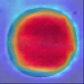

In [ ]:
# plot ScoreCAM of image
print('ScoreCAM of image:')
Image.fromarray(visualization, 'RGB')